## Unsupervised Learning Algorithms

### Clustering Analysis
- #### Kmeans Clustering Algorithm
- #### Agglomerative Hierrarchial Clustering

### Hierrarchial Clustering

- A.k.a Agglomerative clustering, does not require the user to specify the number of clusters. 
- Initially, each point is considered as a separate cluster, then it recursively clusters the points together depending upon the distance between them. 
- The points are clustered in such a way that the distance between points within a cluster is minimum and distance between the cluster is maximum. 
- Commonly used distance measures are Euclidean distance, Manhattan distance or Mahalanobis distance. Unlike k-means clustering, it is "bottom-up" approach.



Reading Reference for Clustering Algorithms -
https://scikit-learn.org/stable/modules/clustering.html#clustering

### Step1: Load Libraries

In [2]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering

### Step2: Load Data

In [3]:
df_raw = pd.read_csv("./data/world-happiness-report/2017.csv")
df_raw.head()

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


### Step3: Explore Data

In [4]:
df_raw.describe()

,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [ ]:
df_raw.columns

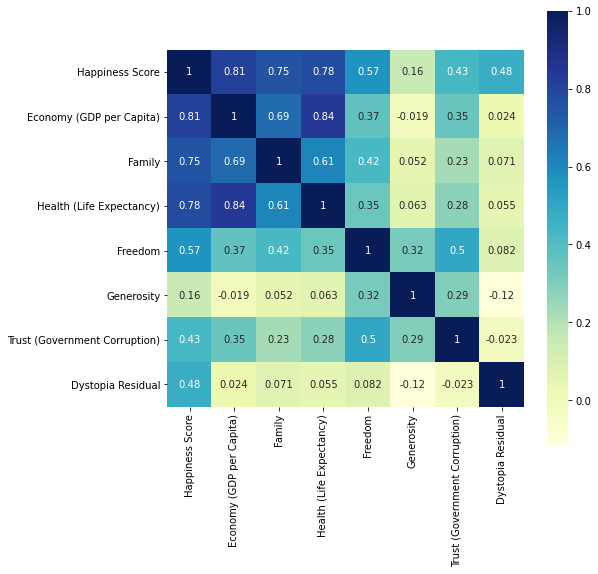

In [5]:
# Plot Correlation Heatmap to analyse correlation between continuous variables
df = df_raw[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)', 'Freedom', 
          'Generosity','Trust (Government Corruption)','Dystopia Residual']] #Subsetting the data
cor = df.corr() #Calculate the correlation of the above variables

fig,ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
sns.heatmap(cor, square = True,annot=True,cmap="YlGnBu") #Plot the correlation as heat map

### Step4: Agglomorative Approach to identify clusters

- Starts with one cluster and adds items or data points closer to it in iterative manner till all the points are added to one single large cluster.
- Its a bottom up approach where clustering starts with individual points and stops at one large cluster that includes all the points.

### Main Approaches to merge data points:
- Single Link: distance between closest members of a cluster. **Most Comonly Used**
- Complete Linkage: distance between members which are farthest apart
- Average Linage: looking at distance between each pair and averages all those distances

In [6]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

In [7]:
clust_labels1 = doAgglomerative(df, 2)
agglomerative = pd.DataFrame(clust_labels1)
df.insert((df.shape[1]),'agglomerative',agglomerative)

In [8]:
# Just to check if kmeans column added to the dataframe
df.tail()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,agglomerative
150,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,0
151,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,0
152,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,0
153,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,0
154,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,0


In [9]:
df.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,agglomerative
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,1
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,1
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,1
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,1
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,1


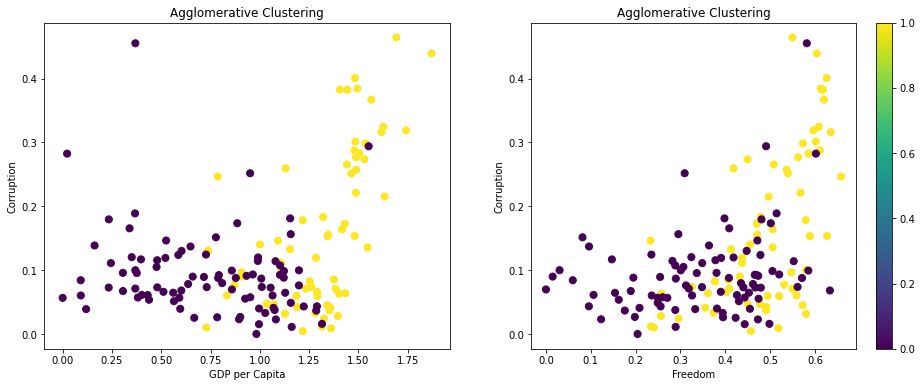

In [10]:
# Plot scatter plot
fig, (ax0,ax1) = plt.subplots(ncols= 2)
fig.set_figwidth(16)
fig.set_figheight(6)

# Scatter plots of Corruption vs GDP
scatter = ax0.scatter(df['Economy (GDP per Capita)'],df['Trust (Government Corruption)'],
                     c=agglomerative[0],s=50)
ax0.set_title('Agglomerative Clustering')
ax0.set_xlabel('GDP per Capita')
ax0.set_ylabel('Corruption')

# Scatter plots of Corruption vs GDP

scatter = ax1.scatter(df['Freedom'],df['Trust (Government Corruption)'],
                     c=agglomerative[0],s=50)
ax1.set_title('Agglomerative Clustering')
ax1.set_xlabel('Freedom')
ax1.set_ylabel('Corruption')

plt.colorbar(scatter)

In [11]:
# Convert Cluster to
label_mapping = {0:"cluster0",1:"cluster1",2:"cluster2"}
df["cluster_name"] = df["agglomerative"].apply(lambda x: label_mapping[x])

<ipython-input-11-ce596090b8fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster_name"] = df["agglomerative"].apply(lambda x: label_mapping[x])


In [12]:
df.tail()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,agglomerative,cluster_name
150,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,0,cluster0
151,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,0,cluster0
152,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,0,cluster0
153,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,0,cluster0
154,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,0,cluster0


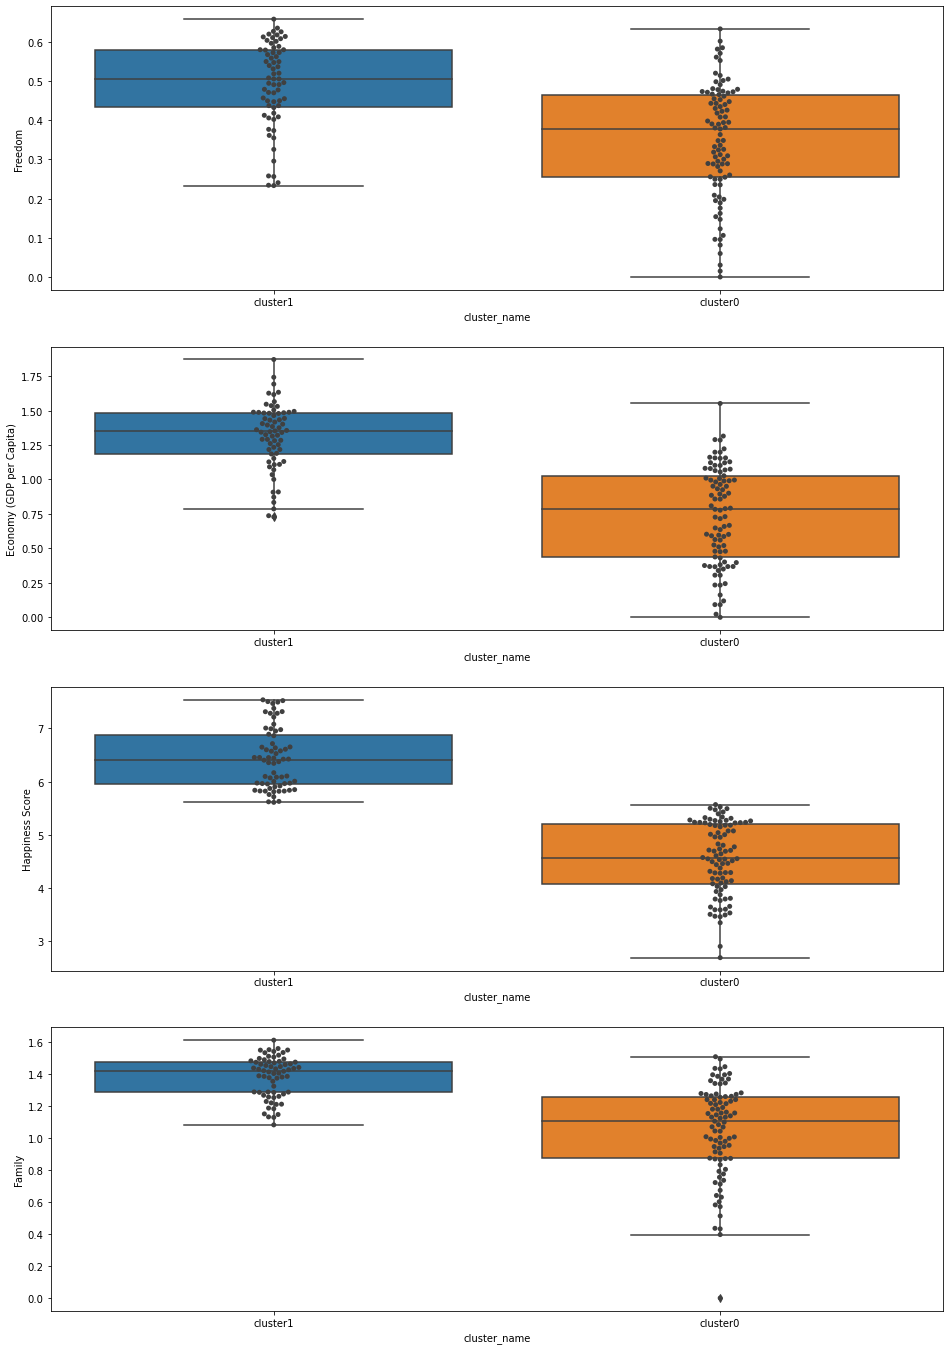

In [13]:
fig, (ax,ax2,ax3,ax4) = plt.subplots(nrows = 4)
fig.set_figwidth(16)
fig.set_figheight(24)
x = sns.boxplot(x="cluster_name", y='Freedom', data=df, ax= ax)
x = sns.swarmplot(x="cluster_name", y='Freedom', data=df,color=".25",ax= ax)
# Cluster analysis of employment
x = sns.boxplot(x="cluster_name", y='Economy (GDP per Capita)', data=df, ax= ax2)
x = sns.swarmplot(x="cluster_name", y='Economy (GDP per Capita)', data=df,color=".25",ax= ax2)
# Cluster analysis of employment
x = sns.boxplot(x="cluster_name", y='Happiness Score', data=df, ax= ax3)
x = sns.swarmplot(x="cluster_name", y='Happiness Score', data=df,color=".25",ax= ax3)
# Cluster analysis of employment
x = sns.boxplot(x="cluster_name", y='Family', data=df, ax= ax4)
x = sns.swarmplot(x="cluster_name", y='Family', data=df,color=".25",ax= ax4)

In [14]:
df_final = df.join(df_raw["Country"])

In [15]:
df_final[df_final["Country"].isin(["Pakistan","India","Bangladesh","Bhutan","Nepal"])]

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,agglomerative,cluster_name,Country
79,5.269,0.726884,0.672691,0.402048,0.235215,0.315446,0.124348,2.792489,0,cluster0,Pakistan
96,5.011,0.885416,1.340127,0.495879,0.501538,0.474055,0.173380,1.140184,0,cluster0,Bhutan
98,4.962,0.479820,1.179283,0.504131,0.440306,0.394096,0.072976,1.891241,0,cluster0,Nepal
109,4.608,0.586683,0.735132,0.533241,0.478357,0.172255,0.123718,1.978736,0,cluster0,Bangladesh
121,4.315,0.792221,0.754373,0.455428,0.469987,0.231538,0.092227,1.519117,0,cluster0,India


In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [17]:
df = df_final.set_index('agglomerative')
# del df.index.name

In [18]:
df.index

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='agglomerative', length=155)

In [19]:
from scipy.cluster import hierarchy

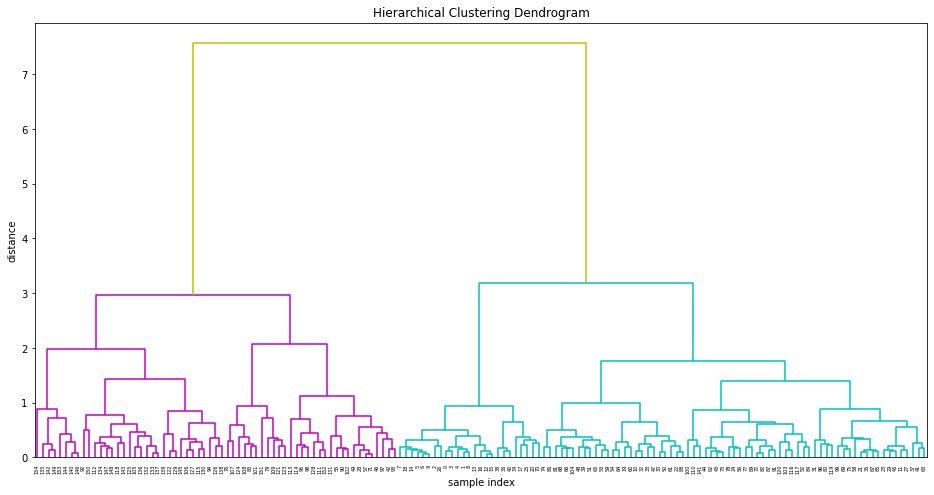

In [20]:
Z = hierarchy.linkage(df_final.iloc[:,1:7],method='ward')
hierarchy.set_link_color_palette(['m', 'c', 'y'])
fig, axes = plt.subplots(figsize=(16, 8))
dn1 = hierarchy.dendrogram(Z, ax=axes, above_threshold_color='y',
                           orientation='top')
# dn2 = hierarchy.dendrogram(Z, ax=axes[1],
#                            above_threshold_color='#bcbddc',
#                            orientation='right')
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()